<a href="https://colab.research.google.com/github/gamodilac/roboticHW/blob/main/DCautoCar_Controller_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3f9c3e463a769901b96df4011990202b50a42ea969d7aa525f378a444962b81a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [18]:
#Input
sensor_right = ctrl.Antecedent(np.arange(0,30.1,0.5), 'sensor_right')
sensor_front    = ctrl.Antecedent(np.arange(0,30.1,0.5), 'sensor_front')
sensor_left = ctrl.Antecedent(np.arange(0,30.1,0.5), 'sensor_left')
#Output
DCservo_1 = ctrl.Consequent(np.arange(0, 100.1, 0.5), 'DCservo_1')
DCservo_2 = ctrl.Consequent(np.arange(0, 100.1, 0.5), 'DCservo_2')

#Tao bien bien doi
#Set_point
sensor_right['near'] = fuzz.gaussmf(sensor_right.universe,0,2.5)
sensor_right['medium'] = fuzz.gaussmf(sensor_right.universe,15,2.5)
sensor_right['far'] = fuzz.gaussmf(sensor_right.universe,30,2.5)

sensor_front['near'] = fuzz.gaussmf(sensor_front.universe,0,2.5)
sensor_front['medium'] = fuzz.gaussmf(sensor_front.universe,15,2.5)
sensor_front['far'] = fuzz.gaussmf(sensor_front.universe,30,2.5)

sensor_left['near'] = fuzz.gaussmf(sensor_left.universe,0,2.5)
sensor_left['medium'] = fuzz.gaussmf(sensor_left.universe,15,2.5)
sensor_left['far'] = fuzz.gaussmf(sensor_left.universe,30,2.5)

DCservo_1['low'] = fuzz.gaussmf(DCservo_1.universe,0,25)
DCservo_1['mid low'] = fuzz.gaussmf(DCservo_1.universe,25,12.5)
DCservo_1['medium'] = fuzz.gaussmf(DCservo_1.universe,50,12.5)
DCservo_1['med-high'] = fuzz.gaussmf(DCservo_1.universe,75,12.5)
DCservo_1['high'] = fuzz.gaussmf(DCservo_1.universe,100,25)

DCservo_2['low'] = fuzz.gaussmf(DCservo_2.universe,0,25)
DCservo_2['mid low'] = fuzz.gaussmf(DCservo_2.universe,25,12.5)
DCservo_2['medium'] = fuzz.gaussmf(DCservo_2.universe,50,12.5)
DCservo_2['med-high'] = fuzz.gaussmf(DCservo_2.universe,75,12.5)
DCservo_2['high'] = fuzz.gaussmf(DCservo_2.universe,100,25)


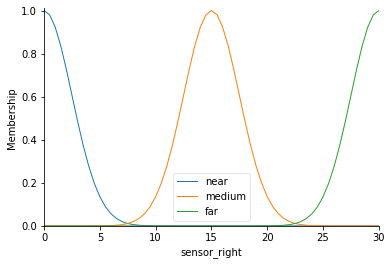

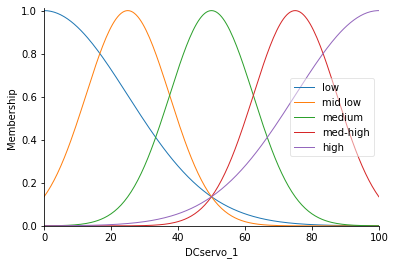

In [19]:
sensor_right.view()
DCservo_1.view()

In [30]:
#Rule của Cảm biến Trước và cảm biến bên trái
rule_1 = ctrl.Rule(sensor_left['near']&sensor_front['near'],DCservo_1['high'])
rule_2 = ctrl.Rule(sensor_left['near']&sensor_front['medium'],DCservo_1['med-high'])
rule_3 = ctrl.Rule(sensor_left['near']&sensor_front['far'],DCservo_1['medium'])
rule_4 = ctrl.Rule(sensor_left['medium']&sensor_front['near'],DCservo_1['med-high'])
rule_5 = ctrl.Rule(sensor_left['medium']&sensor_front['medium'],DCservo_1['medium'])
rule_6 = ctrl.Rule(sensor_left['medium']&sensor_front['far'],DCservo_1['mid low'])
rule_7 = ctrl.Rule(sensor_left['far']&sensor_front['near'],DCservo_1['medium'])
rule_8 = ctrl.Rule(sensor_left['far']&sensor_front['medium'],DCservo_1['mid low'])
rule_9 = ctrl.Rule(sensor_left['far']&sensor_front['far'],DCservo_1['low'],DCservo_2['low'])

#RUle cảu cảm biến trước và cảm biến bên phải
rule_11 = ctrl.Rule(sensor_right['near']&sensor_front['near'],DCservo_2['high'])
rule_22 = ctrl.Rule(sensor_right['near']&sensor_front['medium'],DCservo_2['med-high'])
rule_33 = ctrl.Rule(sensor_right['near']&sensor_front['far'],DCservo_2['medium'])
rule_44 = ctrl.Rule(sensor_right['medium']&sensor_front['near'],DCservo_2['med-high'])
rule_55 = ctrl.Rule(sensor_right['medium']&sensor_front['medium'],DCservo_2['medium'])
rule_66 = ctrl.Rule(sensor_right['medium']&sensor_front['far'],DCservo_2['mid low'])
rule_77 = ctrl.Rule(sensor_right['far']&sensor_front['near'],DCservo_2['medium'])
rule_88 = ctrl.Rule(sensor_right['far']&sensor_front['medium'],DCservo_2['mid low'])
rule_99 = ctrl.Rule(sensor_right['far']&sensor_front['far'],DCservo_2['low'],DCservo_1['low'])



PWM Động cơ bên trái: 50.00000000000002
PWM Động cơ bên phải: 73.99685106912048


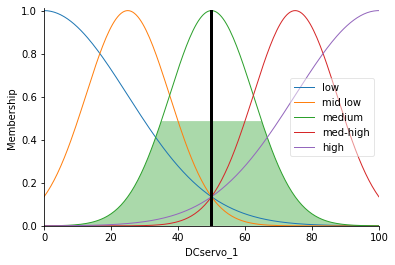

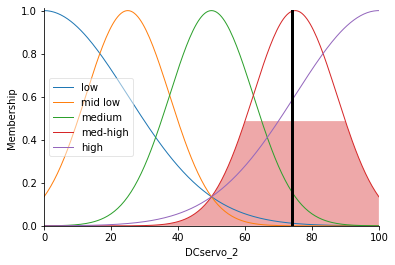

In [32]:
#Note: động cơ 1 bên tay trái và động cơ 2 bên tay phải.
powering_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_11,rule_22,rule_33,rule_44,rule_55,rule_66,rule_77,rule_88,rule_99])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['sensor_left'] = 27        #0~30
powering.input['sensor_front'] = 2       #0~30
powering.input['sensor_right'] = 12       #0~30
powering.compute()
print("PWM Động cơ bên trái:",powering.output['DCservo_1'])
print("PWM Động cơ bên phải:",powering.output['DCservo_2'])
DCservo_1.view(sim = powering)
DCservo_2.view(sim = powering)